In [4]:
from astropy.table import *
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binned_statistic
from tqdm import tqdm

import matplotlib
plt.rc('font', family='serif'), plt.rc('xtick', labelsize=18), plt.rc('ytick', labelsize=18)
plt.rcParams['savefig.dpi'] = 300
plt.rc('text',usetex=True)
matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['ytick.direction'] = 'in'
np.set_printoptions(precision=3)

In [5]:
cat = Table.read('/Volumes/LejaySSD/COSMOS_deep_clauds_hsc_shiraz_cosmos2020_photometry.fits')

In [6]:
cat = cat[cat['i']<26]
cat = cat[cat['ZPHOT']<1.5]

cat = cat[cat['i']>0]
cat = cat[cat['HSC_i_MAG_AUTO']>0]
cat = cat[cat['MAG_AUTO_CH1']>0]
cat = cat[cat['MAG_AUTO_CH2']>0]
cat = cat[cat['IRAC_CH1_MAG']>0]
cat = cat[cat['IRAC_CH2_MAG']>0]

cat = cat[cat['i']<90]
cat = cat[cat['HSC_i_MAG_AUTO']<90]
cat = cat[cat['MAG_AUTO_CH1']<90]
cat = cat[cat['IRAC_CH1_MAG']<90]
cat = cat[cat['MAG_AUTO_CH2']<90]
cat = cat[cat['IRAC_CH2_MAG']<90]
print(len(cat))

122367


#### check $i-CH1$ and $i-CH2$ colors with COSMOS2020

[-0.176 -0.135 -0.083 -0.058 -0.047 -0.042 -0.043 -0.041 -0.026 -0.002]
[0.182 0.253 0.245 0.247 0.131 0.129 0.12  0.133 0.163 0.208]


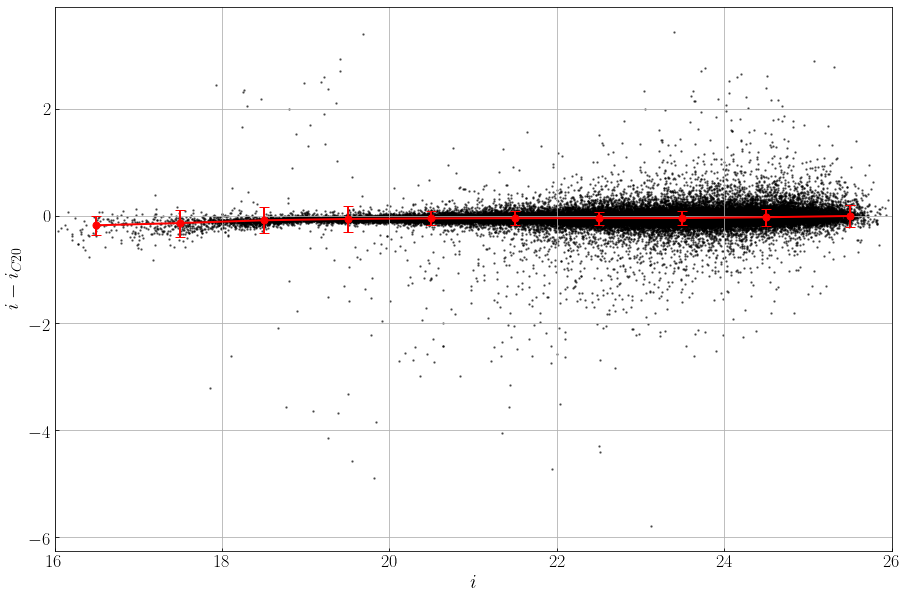

In [10]:
color_diff =  cat['i']-cat['HSC_i_MAG_AUTO']
medians_ch1,bin_edges,bin_numbers = binned_statistic(cat['i'], color_diff, statistic='median', bins=np.arange(16,27,1))
stds_ch1,bin_edges,bin_numbers = binned_statistic(cat['i'], color_diff, statistic='std', bins=np.arange(16,27,1))
print(medians_ch1)
print(stds_ch1)
fig = plt.figure(figsize=(15,10))
plt.scatter(cat['i'], color_diff,color='k',s=2, alpha=0.5)
plt.errorbar(bin_edges[:-1]+0.5,medians_ch1,yerr=stds_ch1,fmt='o-',color='r',linewidth=2,capsize=5,markersize=7)
plt.xlabel('$i$',fontsize=20)
plt.ylabel('$i-i_{C20}$',fontsize=20)
plt.xlim([16,26])
# plt.ylim([-3,3])
plt.grid()
plt.show()

[-0.021 -0.01   0.017  0.035  0.035  0.033  0.026  0.025  0.017 -0.003]
[0.311 0.17  0.199 0.221 0.18  0.216 0.27  0.316 0.375 0.451]


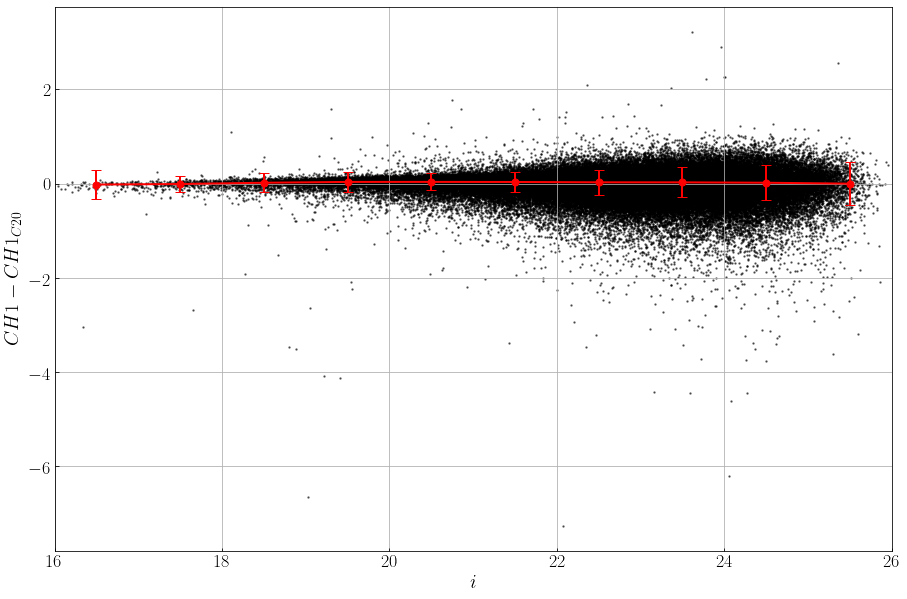

In [13]:
color_diff =  cat['MAG_AUTO_CH1']-cat['IRAC_CH1_MAG']
medians_ch1,bin_edges,bin_numbers = binned_statistic(cat['i'], color_diff, statistic='median', bins=np.arange(16,27,1))
stds_ch1,bin_edges,bin_numbers = binned_statistic(cat['i'], color_diff, statistic='std', bins=np.arange(16,27,1))
print(medians_ch1)
print(stds_ch1)
fig = plt.figure(figsize=(15,10))
plt.scatter(cat['i'], color_diff,color='k',s=2, alpha=0.5)
plt.errorbar(bin_edges[:-1]+0.5,medians_ch1,yerr=stds_ch1,fmt='o-',color='r',linewidth=2,capsize=5,markersize=7)
plt.xlabel('$i$',fontsize=20)
plt.ylabel('$CH1-CH1_{C20}$',fontsize=20)
plt.xlim([16,26])
# plt.ylim([-3,3])
plt.grid()
plt.show()

[-0.144 -0.123 -0.098 -0.092 -0.081 -0.073 -0.065 -0.06  -0.028  0.024]
[0.33  0.319 0.346 0.361 0.213 0.237 0.283 0.332 0.408 0.508]


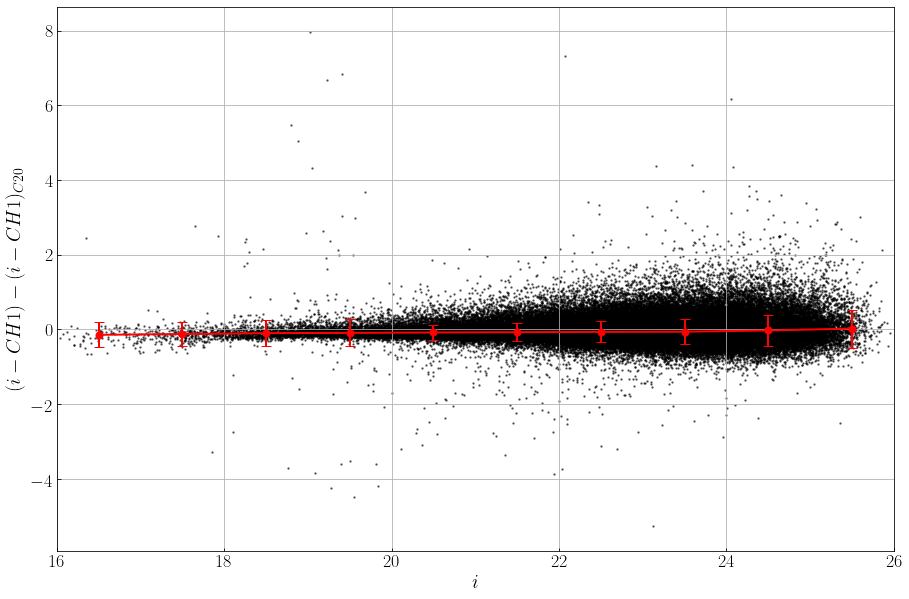

In [8]:
color_diff =  color_diff = (cat['i'] - cat['MAG_AUTO_CH1']) - (cat['HSC_i_MAG_AUTO'] - cat['IRAC_CH1_MAG'])
medians_ch1,bin_edges,bin_numbers = binned_statistic(cat['i'], color_diff, statistic='median', bins=np.arange(16,27,1))
stds_ch1,bin_edges,bin_numbers = binned_statistic(cat['i'], color_diff, statistic='std', bins=np.arange(16,27,1))
print(medians_ch1)
print(stds_ch1)
fig = plt.figure(figsize=(15,10))
plt.scatter(cat['i'], color_diff,color='k',s=2, alpha=0.5)
plt.errorbar(bin_edges[:-1]+0.5,medians_ch1,yerr=stds_ch1,fmt='o-',color='r',linewidth=2,capsize=5,markersize=7)
plt.xlabel('$i$',fontsize=20)
plt.ylabel('$(i-CH1)-(i-CH1)_{C20}$',fontsize=20)
plt.xlim([16,26])
# plt.ylim([-3,3])
plt.grid()
plt.show()

[-0.133 -0.15  -0.12  -0.103 -0.089 -0.076 -0.071 -0.064 -0.034  0.031]
[0.334 0.402 0.396 0.391 0.291 0.303 0.357 0.405 0.453 0.539]


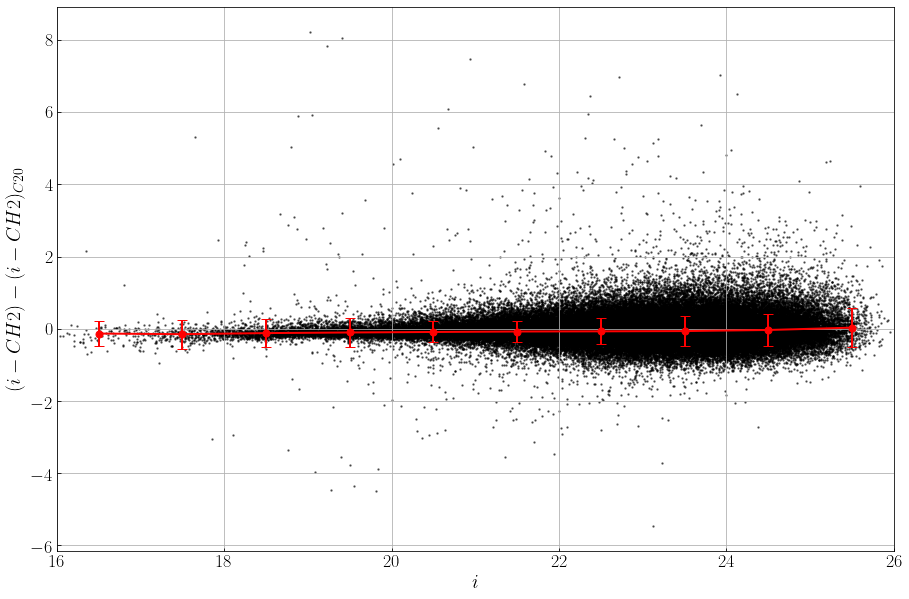

In [36]:
color_diff = (cat['i'] - cat['MAG_AUTO_CH2']) - (cat['HSC_i_MAG_AUTO'] - cat['IRAC_CH2_MAG'])
medians_ch2,bin_edges,bin_numbers = binned_statistic(cat['i'], color_diff, statistic='median', bins=np.arange(16,27,1))
stds_ch2,bin_edges,bin_numbers = binned_statistic(cat['i'], color_diff, statistic='std', bins=np.arange(16,27,1))
print(medians_ch2)
print(stds_ch2)
fig = plt.figure(figsize=(15,10))
plt.scatter(cat['i'], color_diff,color='k',s=2, alpha=0.5)
plt.errorbar(bin_edges[:-1]+0.5, medians_ch2,yerr=stds_ch2,fmt='o-',color='r',linewidth=2,capsize=5,markersize=7)
plt.xlabel('$i$',fontsize=20)
plt.ylabel('$(i-CH2)-(i-CH2)_{C20}$',fontsize=20)
plt.xlim([16,26])
# plt.ylim([-3,3])
plt.grid()
plt.show()

#### write corrected magnitudes to catalog

In [49]:
cat=Table.read('clauds_hsc_shiraz_all.fits')

ch1_corr_list=[]
ch2_corr_list=[]
ch1_corr_err_list=[]
ch2_corr_err_list=[]
for gal in tqdm(cat):
    ch1_corr = gal['MAG_AUTO_CH1'] - np.interp(gal['i'],bin_edges[:-1]+0.5,medians_ch1)
    ch2_corr = gal['MAG_AUTO_CH2'] - np.interp(gal['i'],bin_edges[:-1]+0.5,medians_ch2)
    ch1_corr_err = gal['MAGERR_AUTO_CH1'] - np.interp(gal['i'],bin_edges[:-1]+0.5,medians_ch1)
    ch2_corr_err = gal['MAGERR_AUTO_CH1'] - np.interp(gal['i'],bin_edges[:-1]+0.5,medians_ch2)
    
    ch1_corr_list.append(ch1_corr)
    ch2_corr_list.append(ch2_corr)
    ch1_corr_err_list.append(ch1_corr_err)
    ch2_corr_err_list.append(ch2_corr_err)
    
ch1_corr_col = Column(name='MAG_AUTO_CH1_CORR', data=np.array(ch1_corr_list))
ch2_corr_col = Column(name='MAG_AUTO_CH2_CORR', data=np.array(ch2_corr_list))
ch1_corr_err_col = Column(name='MAGERR_AUTO_CH1_CORR', data=np.array(ch1_corr_err_list))
ch2_corr_err_col = Column(name='MAGERR_AUTO_CH2_CORR', data=np.array(ch2_corr_err_list))

cat.add_columns([ch1_corr_col,ch2_corr_col,ch1_corr_err_col,ch2_corr_err_col])
cat.write('clauds_hsc_shiraz_all_corr.fits', overwrite=True)

100%|██████████| 399464/399464 [00:17<00:00, 23444.26it/s]
